In [1]:
%load_ext autoreload
%autoreload 2
import os
os.environ['CUDA_VISIBLE_DEVICES']='2'

In [2]:
cd /gitprojects/YOLOX/

/gitprojects/YOLOX


In [3]:
from tools.train import *
import mmcv
print('Num of devices:', torch.cuda.device_count())

Num of devices: 1


# Hyps

In [4]:
# %run tools/train.py -f exps/default/nano.py -d 1 -b 2 --fp16 -o

In [5]:
parser = make_parser()
args = mmcv.Config(parser.parse_known_args()[0].__dict__)

args.exp_file = './exps/rotated/nano.py'
args.experiment_name = 'nano-test'
args.devices = 1
args.batch_size = 4
args.occupy = True
args.output_dir = f'./work_dir/{args.name}'

# Model

In [6]:
exp = get_exp(args.exp_file, args.name)
exp.merge(args.opts)


In [7]:
from yolox.data import DataPrefetcher
loader = exp.get_data_loader(3, False)
prefetcher = DataPrefetcher(loader)

loading annotations into memory...
Done (t=0.61s)
creating index...
index created!


# Orientation prediction 

## Create model

In [10]:
model = exp.get_model().cuda()

In [11]:
type(model.head)

yolox.models.rotated_yolo_head.RotatedYOLOXHead

In [39]:
inps, targets = prefetcher.next()

In [74]:
bbox = targets[0,0,1:5]
rbbox = targets[0,0,5:]

In [80]:
from avcv.visualize import *
img = inps[0]
img = tensor2imgs(img.cpu(), mode='chw')

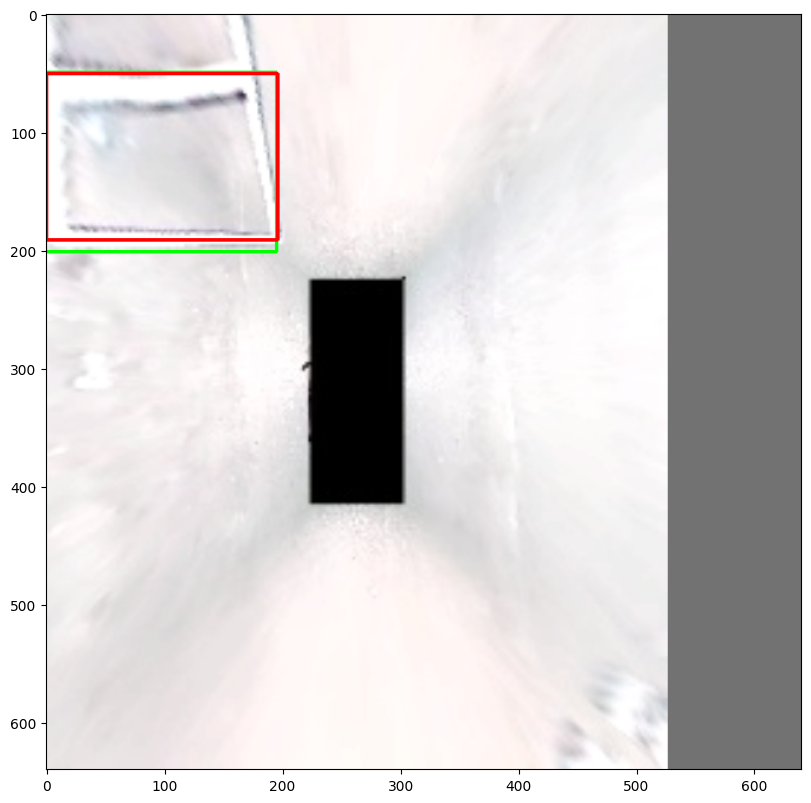

In [77]:
points = boxPoints(torch.Tensor([*bbox, 0]))
x1,y1,w,h = cv2.boundingRect(points)
x2 = x1+w
y2 = y1+h
cv2.rectangle(img, (x1,y1), (x2,y2),(255,0,0), 2)
show(img, dpi=100)

In [155]:
# import cv2
# import torch
# def boxPoints(x):
#     if torch.is_tensor(x):
#         x = x.cpu().numpy().tolist()
#     rbox = (x[0], x[1]),(x[2],x[3]),x[4]
#     return cv2.boxPoints(rbox)

# def drawRect(img, points, color):
#     points = points.astype(int)
#     for i in range(4):
#         j = (i+1)%4
#         cv2.line(img, tuple(points[i].tolist()), tuple(points[j].tolist()), color)
#     return img

# # rbbox = rbbox.cpu().numpy()
# # rbbox = (rbbox[0], rbbox[1]), (rbbox[2], rbbox[3]), rbbox[4]
# points = boxPoints(rbbox)
# x1,y1,w,h = cv2.boundingRect(points)
# x2 = x1+w
# y2 = y1+h
# img = drawRect(img, points, (0,255,0))
# show(img, dpi=100)